In [93]:
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools
import time
import argparse
import os
from pathlib import Path
import datetime

In [94]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [95]:
from astropy.io import fits
#skymap = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2024/bn240612503/current/glg_healpix_all_bn240612503_v00.fit'
#skymap = 'https://gracedb.ligo.org/api/superevents/S240904bv/files/cwb.multiorder.fits,0'

### Set of inputs needed to run the code

In [100]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gbm'

# The url to the FITS file with the sky localization in a healpix format (fits file with name starting by glg_healpix
skymap = 'https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/2024/bn240612503/current/glg_healpix_all_bn240612503_v00.fit'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
obsTime = datetime.datetime.fromisoformat("2023-06-10 14:51:47")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_CTAOS.ini'

# Tiles already observed
#pointingsFile = None
pointingsFile = './output/bn240612503/PGinFoV/SuggestedPointings_2DProbOptimisation.txt'


In [101]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [102]:
#Parse the parameters 
obspar = ObservationParameters()
obspar.add_parsed_args(skymap,obsTime,datasetDir,None,outDir,pointingsFile,alertType)
obspar.from_configfile(cfgFile)

### Run the scheduling

The map is MO? = False
Reducing HRnside to the value from the original map: NSIDE= 128
50% area: 41.545035437952755 deg2
90% area: 187.58212970469577 deg2
Starting the 2D pointing calculation with the following parameters

Filename:  bn240612503
Date:  2023-06-10 14:51:47
Previous pointings:  /Users/mseglar/GitHub/tilepy/examples/launcher/output/bn240612503/PGinFoV/SuggestedPointings_2DProbOptimisation.txt
Dataset:  ../../tilepy/dataset/
Output:  ./output/bn240612503

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-S
Observatory: -24.5 deg
Observatory: -70.17 deg
Observatory: 2635.0 m
Max zenith: 60
Using Greytime is: True
FOV: 4.0
Max runs: 20
Duration: 20
High Resolution NSIDE: 128
Low Resolution NSIDE: 128
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

Loading map from  https://heasarc.gsfc.nasa.gov/FTP/fermi/data/gbm/triggers/202

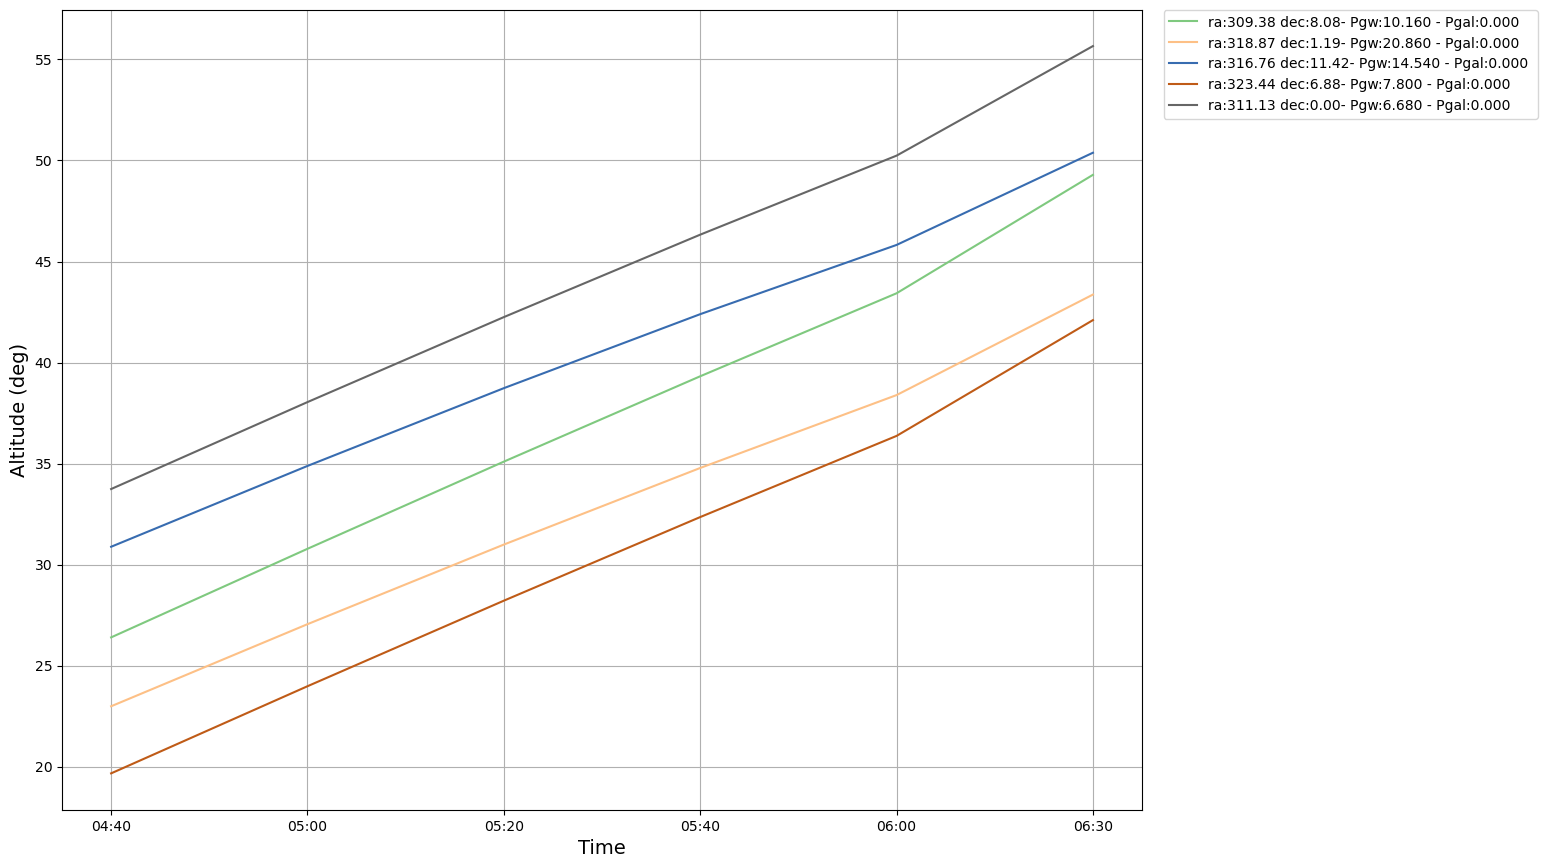

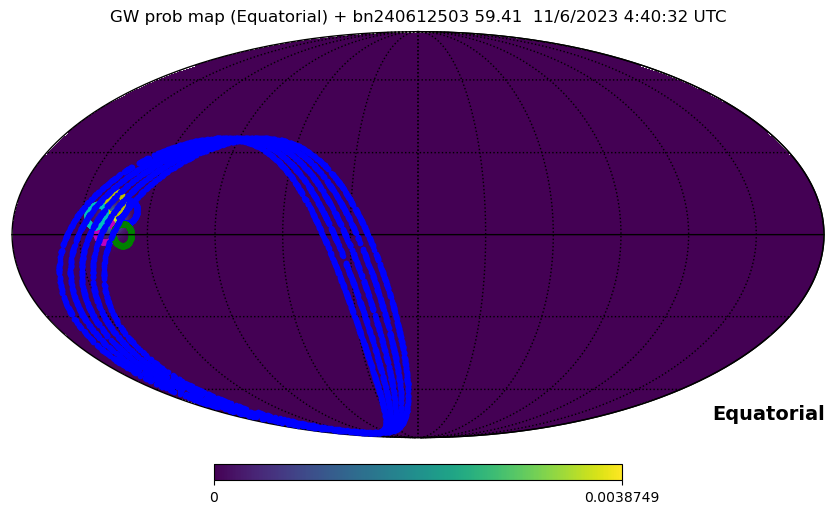

In [99]:
GetSchedule(obspar)